In [1]:
##

In [2]:
##

Noise: 0.0001
Optimized parameters: sigma=9.4088, rho=27.6189, beta=2.6874
True parameters: sigma=10.0000, rho=28.0000, beta=2.6667
MSE: 87.8352
RMSE: 9.3720
Noise: 0.001
Optimized parameters: sigma=9.4218, rho=27.6195, beta=2.7088
True parameters: sigma=10.0000, rho=28.0000, beta=2.6667
MSE: 95.9895
RMSE: 9.7974
Noise: 0.01
Optimized parameters: sigma=9.4397, rho=27.9767, beta=2.8132
True parameters: sigma=10.0000, rho=28.0000, beta=2.6667
MSE: 64.5353
RMSE: 8.0334
Noise: 0.1
Optimized parameters: sigma=9.2586, rho=26.9622, beta=2.4770
True parameters: sigma=10.0000, rho=28.0000, beta=2.6667
MSE: 98.4454
RMSE: 9.9220


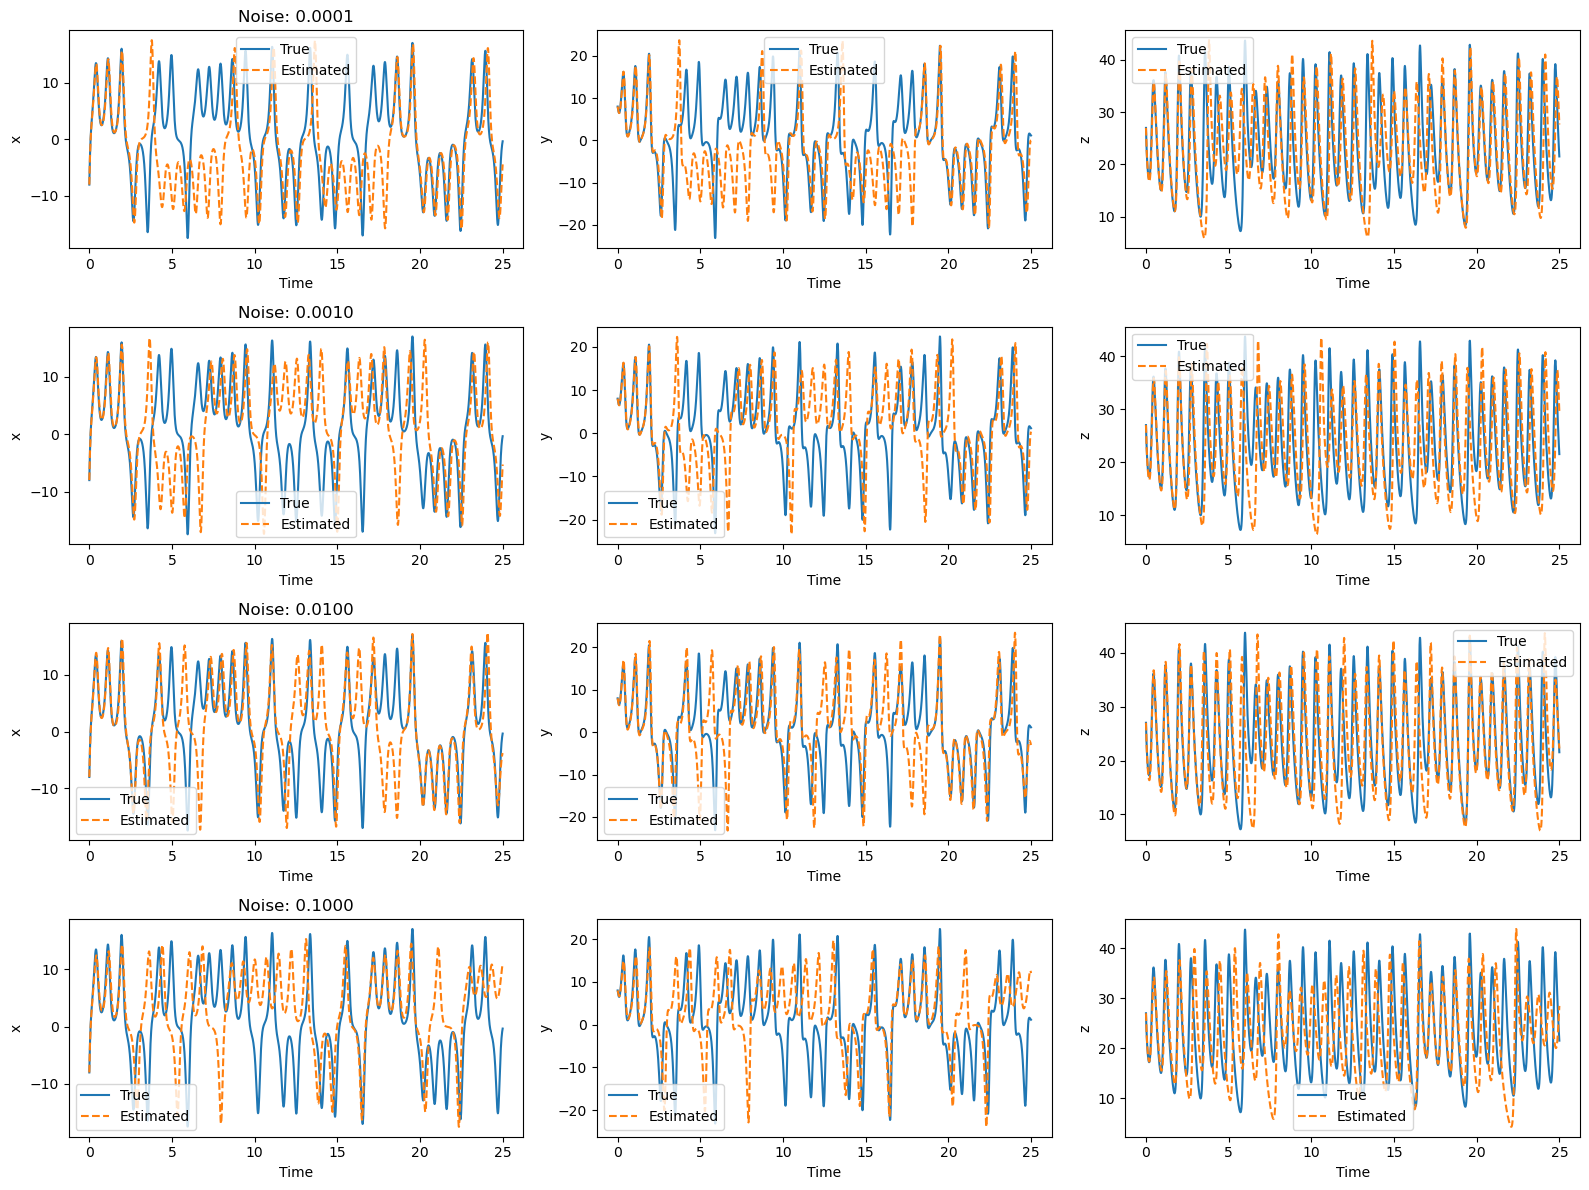

In [3]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
import matplotlib.pyplot as plt


# Define the Lorenz system function
def lorenz(t, y, sigma, rho, beta):
    x, y, z = y
    dxdt = sigma*(y - x)
    dydt = x*(rho - z) - y
    dzdt = x*y - beta*z
    return [dxdt, dydt, dzdt]


# Define the objective function
def objective(x, t, y_data):
    y0 = [-8, 8, 27]  # initial conditions
    sol = solve_ivp(lambda t, y: lorenz(t, y, x[0], x[1], x[2]), [t[0], t[-1]], y0, t_eval=t)
    y_pred = sol.y
    return np.sum((y_data - y_pred)**2)


# Generate some noisy data
dt = 0.01
t = np.arange(0, 25, dt)
sigma_true = 10.0
rho_true = 28.0
beta_true = 8/3

noises = [0.0001, 0.001, 0.01, 0.1]

fig, axs = plt.subplots(len(noises), 3, figsize=(16, 12))

for i, noise in enumerate(noises):
    print(f"Noise: {noise}")
    y_true = solve_ivp(lambda t, y: lorenz(t, y, sigma_true, rho_true, beta_true), [t[0], t[-1]], [-8, 8, 27], t_eval=t).y
    y_data = y_true + noise*np.random.randn(*y_true.shape)

    # Estimate the parameters using trust region method
    x0 = [9.5, 27.5, 2.6]  # initial guess for sigma, rho, beta
    res = minimize(lambda x: objective(x, t, y_data), x0, method='trust-constr', bounds=[(0, None), (0, None), (0, None)])
    sigma_opt, rho_opt, beta_opt = res.x
    print(f"Optimized parameters: sigma={sigma_opt:.4f}, rho={rho_opt:.4f}, beta={beta_opt:.4f}")
    print(f"True parameters: sigma={sigma_true:.4f}, rho={rho_true:.4f}, beta={beta_true:.4f}")

    # Solve the differential equation using the optimized parameters
    y0 = [-8, 8, 27]  # initial conditions
    sol = solve_ivp(lambda t, y: lorenz(t, y, sigma_opt, rho_opt, beta_opt), [t[0], t[-1]], y0, t_eval=t)

    # Compute the MSE and RMSE
    mse = np.mean((y_data - sol.y)**2)
    rmse = np.sqrt(mse)
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")

    # Plot the results
    axs[i, 0].plot(t, y_true[0], '-', label='True')
    axs[i, 0].plot(t, sol.y[0], '--', label='Estimated')
    axs[i, 0].set_xlabel('Time')
    axs[i, 0].set_ylabel('x')
    axs[i, 0].legend()
    axs[i, 0].set_title(f"Noise: {noise:.4f}")

    axs[i, 1].plot(t, y_true[1], '-', label='True')
    axs[i, 1].plot(t, sol.y[1], '--', label='Estimated')
    axs[i, 1].set_xlabel('Time')
    axs[i, 1].set_ylabel('y')
    axs[i, 1].legend()

    axs[i, 2].plot(t, y_true[2], '-', label='True')
    axs[i, 2].plot(t, sol.y[2], '--', label='Estimated')
    axs[i, 2].set_xlabel('Time')
    axs[i, 2].set_ylabel('z')
    axs[i, 2].legend()

plt.tight_layout()
plt.show()

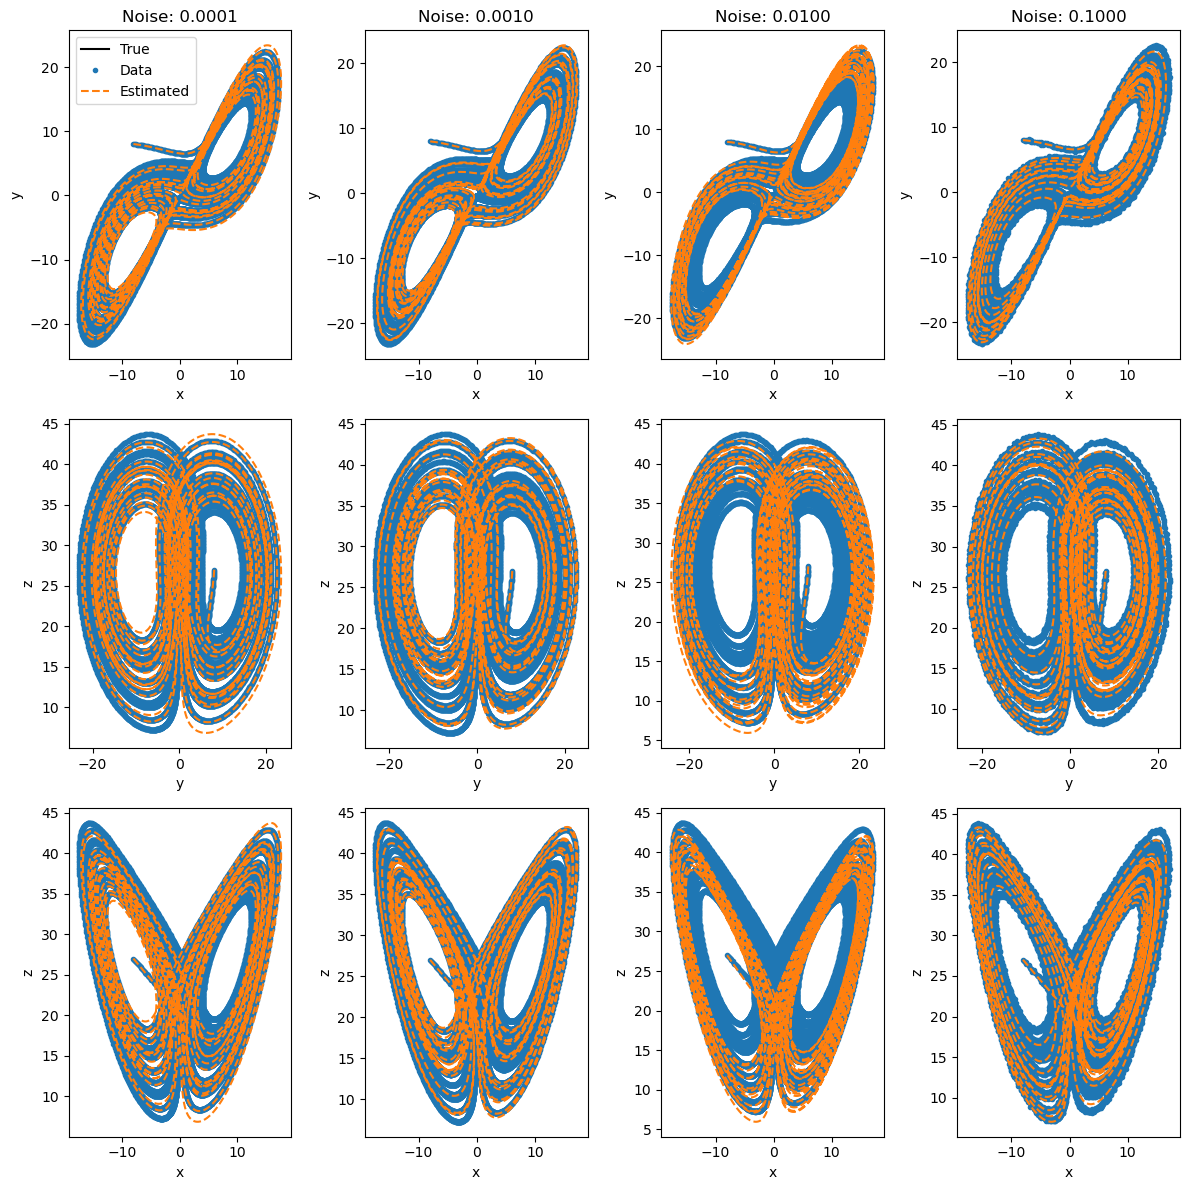

In [4]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Define the Lorenz system function
def lorenz(t, y, sigma, rho, beta):
    x, y, z = y
    dxdt = sigma*(y - x)
    dydt = x*(rho - z) - y
    dzdt = x*y - beta*z
    return [dxdt, dydt, dzdt]

# Define the objective function
def objective(x, t, y_data):
    y0 = [-8, 8, 27]  # initial conditions
    sol = solve_ivp(lambda t, y: lorenz(t, y, x[0], x[1], x[2]), [t[0], t[-1]], y0, t_eval=t)
    y_pred = sol.y
    return np.sum((y_data - y_pred)**2)

# Generate some noisy data
dt = 0.001
t = np.arange(0, 25, dt)
sigma_true = 10.0
rho_true = 28.0
beta_true = 8/3

noises = [0.0001, 0.001, 0.01, 0.1]

fig, axs = plt.subplots(nrows=3, ncols=len(noises), figsize=(12, 12))

for i, noise in enumerate(noises):
    y_true = solve_ivp(lambda t, y: lorenz(t, y, sigma_true, rho_true, beta_true), [t[0], t[-1]], [-8, 8, 27], t_eval=t).y
    y_data = y_true + noise*np.random.randn(*y_true.shape)

    # Optimize the parameters
    x0 = [10, 28, 8/3]  # initial guess
    res = minimize(lambda x: objective(x, t, y_data), x0, method='trust-constr', bounds=[(0, None), (0, None), (0, None)])
    x_opt = res.x

    # Compute the estimated trajectory
    sol = solve_ivp(lambda t, y: lorenz(t, y, x_opt[0], x_opt[1], x_opt[2]), [t[0], t[-1]], [-8, 8, 27], t_eval=t)

    # Plot the estimated trajectory in x-y plane
    axs[0, i].plot(y_true[0], y_true[1], 'k-', label='True')
    axs[0, i].plot(y_data[0], y_data[1], '.', label='Data')
    axs[0, i].plot(sol.y[0], sol.y[1], '--', label='Estimated')
    axs[0, i].set_xlabel('x')
    axs[0, i].set_ylabel('y')
    axs[0, i].set_title(f"Noise: {noise:.4f}")

    # Plot the estimated trajectory in y-z plane
    axs[1, i].plot(y_true[1], y_true[2], 'k-', label='True')
    axs[1, i].plot(y_data[1], y_data[2], '.', label='Data')
    axs[1, i].plot(sol.y[1], sol.y[2], '--', label='Estimated')
    axs[1, i].set_xlabel('y')
    axs[1, i].set_ylabel('z')
    #axs[1, i].set_title(f"Noise: {noise:.4f}")

    # Plot the estimated trajectory in x-z plane
    axs[2, i].plot(y_true[0], y_true[2], 'k-', label='True')
    axs[2, i].plot(y_data[0], y_data[2], '.', label='Data')
    axs[2, i].plot(sol.y[0], sol.y[2], '--', label='Estimated')
    axs[2, i].set_xlabel('x')
    axs[2, i].set_ylabel('z')
    #axs[2, i].set_title(f"Noise: {noise:.4f}")

    if i == 0:
        axs[0, i].legend()

plt.tight_layout()
plt.show()

## Iterate the simulation 10 times with gaussian noise at different levels

In [6]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Define the Lorenz system function
def lorenz(t, y, sigma, rho, beta):
    x, y, z = y
    dxdt = sigma*(y - x)
    dydt = x*(rho - z) - y
    dzdt = x*y - beta*z
    return [dxdt, dydt, dzdt]

# Define the objective function
def objective(x, t, y_data):
    y0 = [-8, 8, 27]  # initial conditions
    sol = solve_ivp(lambda t, y: lorenz(t, y, x[0], x[1], x[2]), [t[0], t[-1]], y0, t_eval=t)
    y_pred = sol.y
    return np.sum((y_data - y_pred)**2)

# Generate some noisy data
dt = 0.01
t = np.arange(0, 25, dt)
sigma_true = 10.0
rho_true = 28.0
beta_true = 8/3

noises = [0.0001, 0.001, 0.01, 0.1]

num_iterations = 10
avg_sigma_opt = np.zeros(num_iterations)
avg_rho_opt = np.zeros(num_iterations)
avg_beta_opt = np.zeros(num_iterations)
avg_mse = np.zeros(num_iterations)
avg_rmse = np.zeros(num_iterations)

for i in range(num_iterations):
    print(f"Iteration: {i+1}")
    sigma_opt_values = []
    rho_opt_values = []
    beta_opt_values = []
    mse_values = []
    rmse_values = []

    for noise in noises:
        print(f"Noise: {noise}")
        y_true = solve_ivp(lambda t, y: lorenz(t, y, sigma_true, rho_true, beta_true), [t[0], t[-1]], [-8, 8, 27], t_eval=t).y
        y_data = y_true + noise*np.random.randn(*y_true.shape)

        # Estimate the parameters using trust region method
        x0 = [9.5, 27.5, 2.6]  # initial guess for sigma, rho, beta
        res = minimize(lambda x: objective(x, t, y_data), x0, method='trust-constr', bounds=[(0, None), (0, None), (0, None)])
        sigma_opt, rho_opt, beta_opt = res.x
        sigma_opt_values.append(sigma_opt)
        rho_opt_values.append(rho_opt)
        beta_opt_values.append(beta_opt)
        print(f"Optimized parameters: sigma={sigma_opt:.4f}, rho={rho_opt:.4f}, beta={beta_opt:.4f}")
        print(f"True parameters: sigma={sigma_true:.4f}, rho={rho_true:.4f}, beta={beta_true:.4f}")

        # Solve the differential equation using the optimized parameters
        y0 = [-8, 8, 27]  # initial conditions
        sol = solve_ivp(lambda t, y: lorenz(t, y, sigma_opt, rho_opt, beta_opt), [t[0], t[-1]], y0, t_eval=t)

        # Compute the MSE and RMSE
        mse = np.mean((y_data - sol.y)**2)
        rmse = np.sqrt(mse)
        mse_values.append(mse)
        rmse_values.append(rmse)
        print(f"MSE: {mse:.4f}")
        print(f"RMSE: {rmse:.4f}")

    avg_sigma_opt[i] = np.mean(sigma_opt_values)
    avg_rho_opt[i] = np.mean(rho_opt_values)
    avg_beta_opt[i] = np.mean(beta_opt_values)
    avg_mse[i] = np.mean(mse_values)
    avg_rmse[i] = np.mean(rmse_values)

print(f"Average sigma_opt: {np.mean(avg_sigma_opt):.4f}")
print(f"Average rho_opt: {np.mean(avg_rho_opt):.4f}")
print(f"Average beta_opt: {np.mean(avg_beta_opt):.4f}")
print(f"Average MSE: {np.mean(avg_mse):.4f}")
print(f"Average RMSE: {np.mean(avg_rmse):.4f}")

Iteration: 1
Noise: 0.0001
Optimized parameters: sigma=9.0073, rho=27.3244, beta=2.9203
True parameters: sigma=10.0000, rho=28.0000, beta=2.6667
MSE: 52.1803
RMSE: 7.2236
Noise: 0.001
Optimized parameters: sigma=9.5479, rho=27.4044, beta=2.3869
True parameters: sigma=10.0000, rho=28.0000, beta=2.6667
MSE: 98.1875
RMSE: 9.9090
Noise: 0.01
Optimized parameters: sigma=9.8883, rho=28.5695, beta=2.6055
True parameters: sigma=10.0000, rho=28.0000, beta=2.6667
MSE: 100.7940
RMSE: 10.0396
Noise: 0.1
Optimized parameters: sigma=9.3932, rho=27.9909, beta=2.8498
True parameters: sigma=10.0000, rho=28.0000, beta=2.6667
MSE: 75.5334
RMSE: 8.6910
Iteration: 2
Noise: 0.0001
Optimized parameters: sigma=9.4691, rho=27.5197, beta=2.6141
True parameters: sigma=10.0000, rho=28.0000, beta=2.6667
MSE: 85.6179
RMSE: 9.2530
Noise: 0.001
Optimized parameters: sigma=9.3986, rho=27.5124, beta=2.8341
True parameters: sigma=10.0000, rho=28.0000, beta=2.6667
MSE: 70.6203
RMSE: 8.4036
Noise: 0.01
Optimized parameter

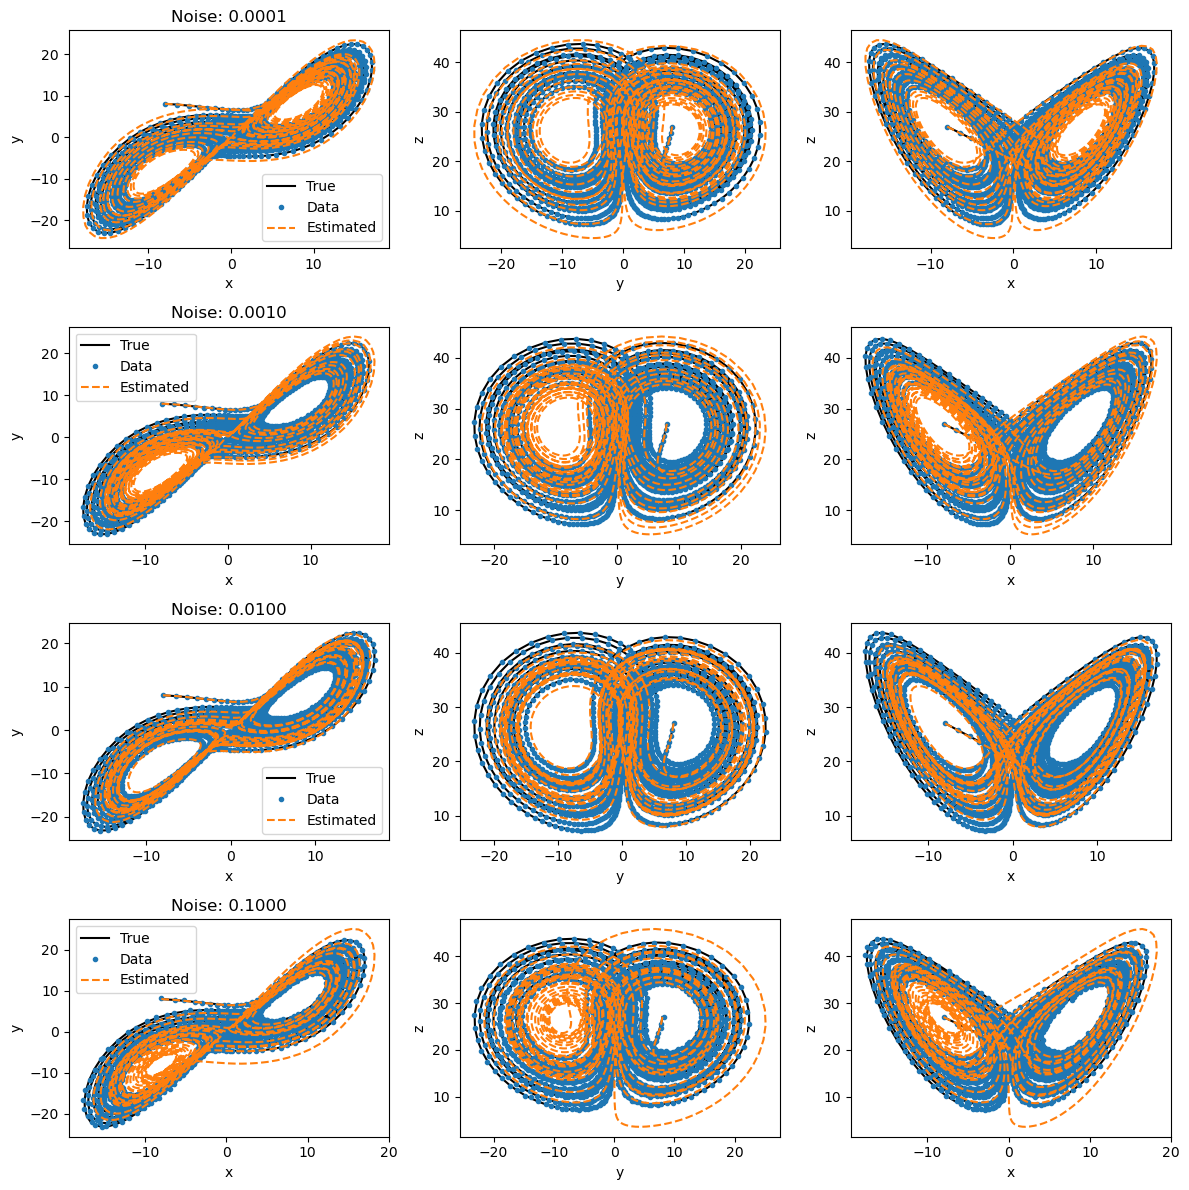

In [7]:
fig, axs = plt.subplots(len(noises), 3, figsize=(12, 12))

for i, noise in enumerate(noises):
    y_true = solve_ivp(lambda t, y: lorenz(t, y, sigma_true, rho_true, beta_true), [t[0], t[-1]], [-8, 8, 27], t_eval=t).y
    y_data = y_true + noise*np.random.randn(*y_true.shape)
    
    # Estimate the parameters using trust region method
    x0 = [9.5, 27.5, 2.6]  # initial guess for sigma, rho, beta
    res = minimize(lambda x: objective(x, t, y_data), x0, method='trust-constr', bounds=[(0, None), (0, None), (0, None)])
    sigma_opt, rho_opt, beta_opt = res.x

    # Solve the differential equation using the optimized parameters
    y0 = [-8, 8, 27]  # initial conditions
    sol = solve_ivp(lambda t, y: lorenz(t, y, sigma_opt, rho_opt, beta_opt), [t[0], t[-1]], y0, t_eval=t)

    # Plot the estimated trajectory in x-y plane
    axs[i, 0].plot(y_true[0], y_true[1], 'k-', label='True')
    axs[i, 0].plot(y_data[0], y_data[1], '.', label='Data')
    axs[i, 0].plot(sol.y[0], sol.y[1], '--', label='Estimated')
    axs[i, 0].set_xlabel('x')
    axs[i, 0].set_ylabel('y')
    axs[i, 0].set_title(f"Noise: {noise:.4f}")
    axs[i, 0].legend()

    # Plot the estimated trajectory in y-z plane
    axs[i, 1].plot(y_true[1], y_true[2], 'k-', label='True')
    axs[i, 1].plot(y_data[1], y_data[2], '.', label='Data')
    axs[i, 1].plot(sol.y[1], sol.y[2], '--', label='Estimated')
    axs[i, 1].set_xlabel('y')
    axs[i, 1].set_ylabel('z')
    #axs[i, 1].set_title(f"Noise: {noise:.4f}")
    #axs[i, 1].legend()

    # Plot the estimated trajectory in x-z plane
    axs[i, 2].plot(y_true[0], y_true[2], 'k-', label='True')
    axs[i, 2].plot(y_data[0], y_data[2], '.', label='Data')
    axs[i, 2].plot(sol.y[0], sol.y[2], '--', label='Estimated')
    axs[i, 2].set_xlabel('x')
    axs[i, 2].set_ylabel('z')
    #axs[i, 2].set_title(f"Noise: {noise:.4f}")
    #axs[i, 2].legend()

plt.tight_layout()
plt.show()


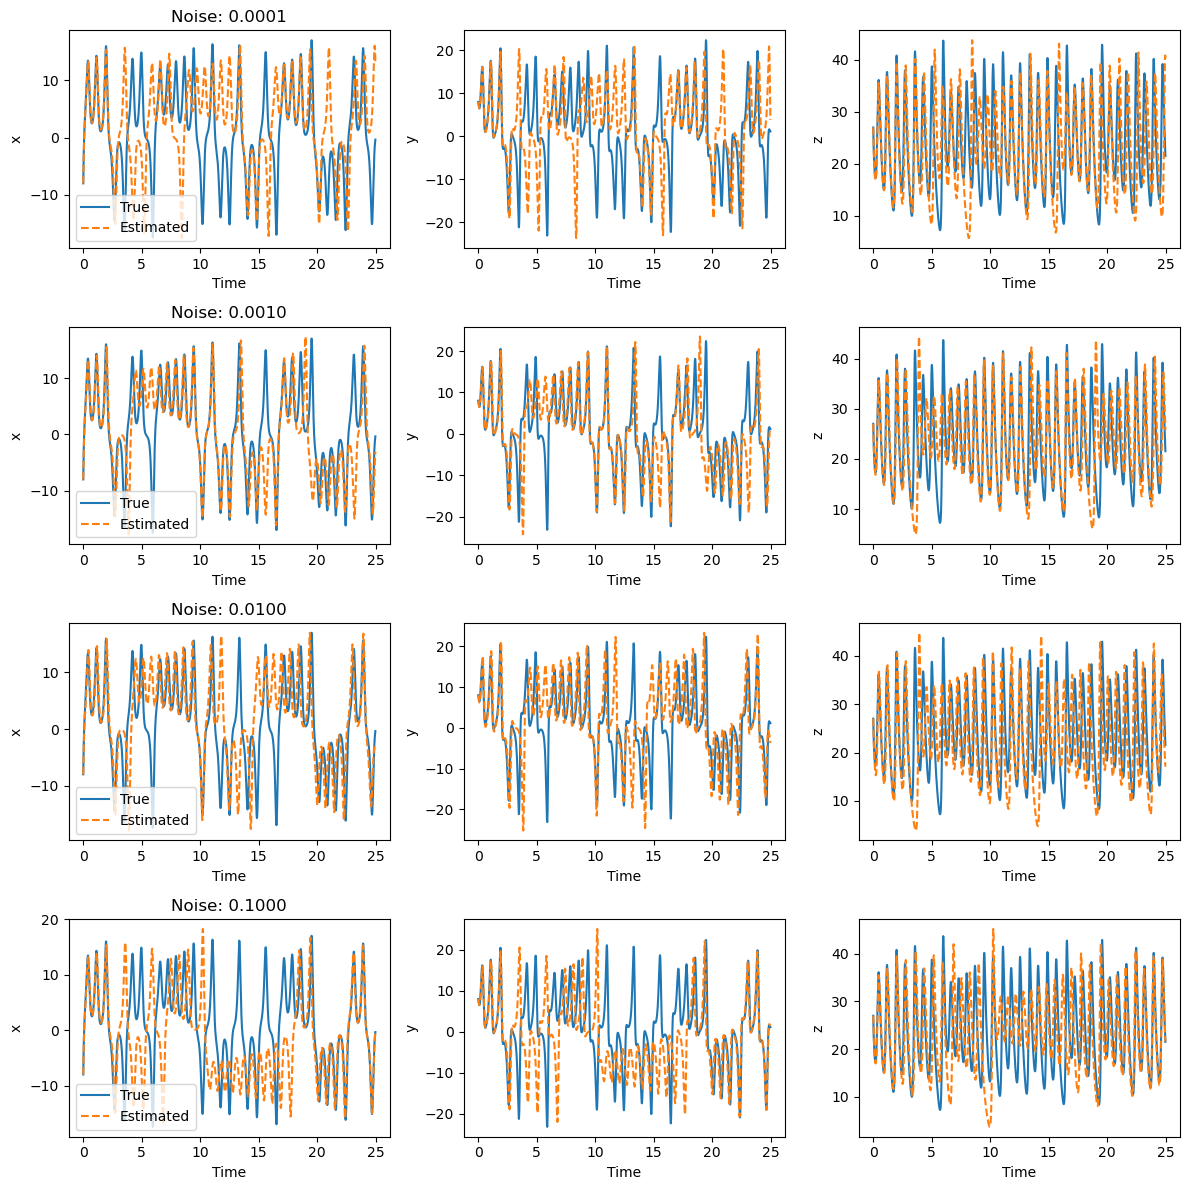

In [8]:
fig, axs = plt.subplots(len(noises), 3, figsize=(12, 12))

for i, noise in enumerate(noises):
    y_true = solve_ivp(lambda t, y: lorenz(t, y, sigma_true, rho_true, beta_true), [t[0], t[-1]], [-8, 8, 27], t_eval=t).y
    y_data = y_true + noise*np.random.randn(*y_true.shape)
    
    # Estimate the parameters using trust region method
    x0 = [9.5, 27.5, 2.6]  # initial guess for sigma, rho, beta
    res = minimize(lambda x: objective(x, t, y_data), x0, method='trust-constr', bounds=[(0, None), (0, None), (0, None)])
    sigma_opt, rho_opt, beta_opt = res.x

    # Solve the differential equation using the optimized parameters
    y0 = [-8, 8, 27]  # initial conditions
    sol = solve_ivp(lambda t, y: lorenz(t, y, sigma_opt, rho_opt, beta_opt), [t[0], t[-1]], y0, t_eval=t)

    axs[i, 0].plot(t, y_true[0], '-', label='True')
    axs[i, 0].plot(t, sol.y[0], '--', label='Estimated')
    axs[i, 0].set_xlabel('Time')
    axs[i, 0].set_ylabel('x')
    axs[i, 0].set_title(f"Noise: {noise:.4f}")
    axs[i, 0].legend()

    axs[i, 1].plot(t, y_true[1], '-', label='True')
    axs[i, 1].plot(t, sol.y[1], '--', label='Estimated')
    axs[i, 1].set_xlabel('Time')
    axs[i, 1].set_ylabel('y')
    #axs[i, 1].set_title(f"Noise: {noise:.4f}")
    #axs[i, 1].legend()

    axs[i, 2].plot(t, y_true[2], '-', label='True')
    axs[i, 2].plot(t, sol.y[2], '--', label='Estimated')
    axs[i, 2].set_xlabel('Time')
    axs[i, 2].set_ylabel('z')
    #axs[i, 2].set_title(f"Noise: {noise:.4f}")
    #axs[i, 2].legend()

plt.tight_layout()
plt.show()

## With colored noise (pink noise) 

In [10]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Define the Lorenz system function
def lorenz(t, y, sigma, rho, beta):
    x, y, z = y
    dxdt = sigma*(y - x)
    dydt = x*(rho - z) - y
    dzdt = x*y - beta*z
    return [dxdt, dydt, dzdt]

# Define the objective function
def objective(x, t, y_data):
    y0 = [-8, 8, 27]  # initial conditions
    sol = solve_ivp(lambda t, y: lorenz(t, y, x[0], x[1], x[2]), [t[0], t[-1]], y0, t_eval=t)
    y_pred = sol.y
    return np.sum((y_data - y_pred)**2)

# Generate some noisy data
dt = 0.01
t = np.arange(0, 25, dt)
sigma_true = 10.0
rho_true = 28.0
beta_true = 8/3

noises = [0.0001, 0.001, 0.01, 0.1]

num_iterations = 10
avg_sigma_opt = np.zeros(num_iterations)
avg_rho_opt = np.zeros(num_iterations)
avg_beta_opt = np.zeros(num_iterations)
avg_mse = np.zeros(num_iterations)
avg_rmse = np.zeros(num_iterations)

for i in range(num_iterations):
    print(f"Iteration: {i+1}")
    sigma_opt_values = []
    rho_opt_values = []
    beta_opt_values = []
    mse_values = []
    rmse_values = []

    for noise in noises:
        print(f"Noise: {noise}")
        y_true = solve_ivp(lambda t, y: lorenz(t, y, sigma_true, rho_true, beta_true), [t[0], t[-1]], [-8, 8, 27], t_eval=t).y

        # Generate colored noise with the desired spectral characteristics (pink noise)
        n = len(t)
        dt = t[1] - t[0]
        freq = np.fft.fftfreq(n, dt)
        power_spectrum = np.sqrt(1 / np.abs(freq))
        power_spectrum[0] = 0
        colored_noise = np.fft.ifft(np.fft.fft(np.random.normal(0, 1, n)) * power_spectrum).real

        y_data = y_true + noise * colored_noise

        # Estimate the parameters using trust region method
        x0 = [9.5, 27.5, 2.6]  # initial guess for sigma, rho, beta
        res = minimize(lambda x: objective(x, t, y_data), x0, method='trust-constr', bounds=[(0, None), (0, None), (0, None)])
        sigma_opt, rho_opt, beta_opt = res.x
        sigma_opt_values.append(sigma_opt)
        rho_opt_values.append(rho_opt)
        beta_opt_values.append(beta_opt)
        print(f"Optimized parameters: sigma={sigma_opt:.4f}, rho={rho_opt:.4f}, beta={beta_opt:.4f}")
        print(f"True parameters: sigma={sigma_true:.4f}, rho={rho_true:.4f}, beta={beta_true:.4f}")

        # Solve the differential equation using the optimized parameters
        y0 = [-8, 8, 27]  # initial conditions
        sol = solve_ivp(lambda t, y: lorenz(t, y, sigma_opt, rho_opt, beta_opt), [t[0], t[-1]], y0, t_eval=t)

        # Compute the MSE and RMSE
        mse = np.mean((y_data - sol.y)**2)
        rmse = np.sqrt(mse)
        mse_values.append(mse)
        rmse_values.append(rmse)
        print(f"MSE: {mse:.4f}")
        print(f"RMSE: {rmse:.4f}")

    avg_sigma_opt[i] = np.mean(sigma_opt_values)
    avg_rho_opt[i] = np.mean(rho_opt_values)
    avg_beta_opt[i] = np.mean(beta_opt_values)
    avg_mse[i] = np.mean(mse_values)
    avg_rmse[i] = np.mean(rmse_values)

print(f"Average sigma_opt: {np.mean(avg_sigma_opt):.4f}")
print(f"Average rho_opt: {np.mean(avg_rho_opt):.4f}")
print(f"Average beta_opt: {np.mean(avg_beta_opt):.4f}")
print(f"Average MSE: {np.mean(avg_mse):.4f}")
print(f"Average RMSE: {np.mean(avg_rmse):.4f}")

Iteration: 1
Noise: 0.0001


/tmp/ipykernel_127680/616056205.py:53: RuntimeWarning: divide by zero encountered in true_divide
  power_spectrum = np.sqrt(1 / np.abs(freq))


Optimized parameters: sigma=9.4484, rho=27.9769, beta=2.9314
True parameters: sigma=10.0000, rho=28.0000, beta=2.6667
MSE: 74.5410
RMSE: 8.6337
Noise: 0.001
Optimized parameters: sigma=9.7333, rho=27.6881, beta=2.4411
True parameters: sigma=10.0000, rho=28.0000, beta=2.6667
MSE: 77.9137
RMSE: 8.8269
Noise: 0.01
Optimized parameters: sigma=9.5534, rho=27.5454, beta=2.5849
True parameters: sigma=10.0000, rho=28.0000, beta=2.6667
MSE: 99.5868
RMSE: 9.9793
Noise: 0.1
Optimized parameters: sigma=9.4069, rho=27.9121, beta=2.8672
True parameters: sigma=10.0000, rho=28.0000, beta=2.6667
MSE: 50.9256
RMSE: 7.1362
Iteration: 2
Noise: 0.0001
Optimized parameters: sigma=9.4911, rho=27.7727, beta=2.8958
True parameters: sigma=10.0000, rho=28.0000, beta=2.6667
MSE: 76.1774
RMSE: 8.7280
Noise: 0.001
Optimized parameters: sigma=12.2554, rho=24.0594, beta=3.0512
True parameters: sigma=10.0000, rho=28.0000, beta=2.6667
MSE: 110.1676
RMSE: 10.4961
Noise: 0.01
Optimized parameters: sigma=9.4772, rho=27.68

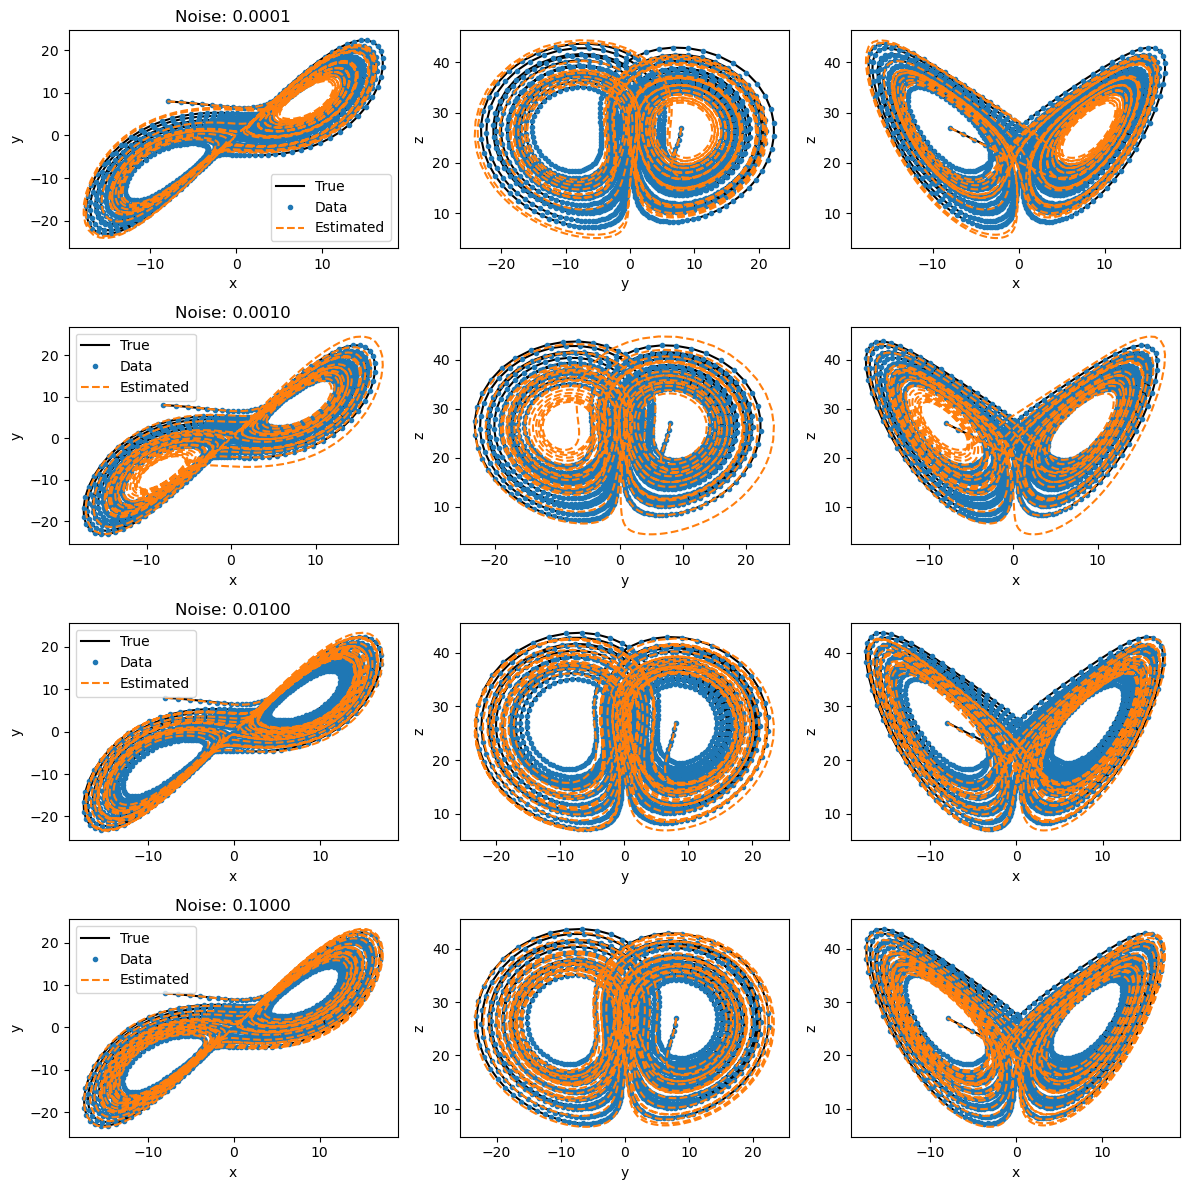

In [11]:
fig, axs = plt.subplots(len(noises), 3, figsize=(12, 12))

for i, noise in enumerate(noises):
    y_true = solve_ivp(lambda t, y: lorenz(t, y, sigma_true, rho_true, beta_true), [t[0], t[-1]], [-8, 8, 27], t_eval=t).y
    y_data = y_true + noise * colored_noise
    
    # Estimate the parameters using trust region method
    x0 = [9.5, 27.5, 2.6]  # initial guess for sigma, rho, beta
    res = minimize(lambda x: objective(x, t, y_data), x0, method='trust-constr', bounds=[(0, None), (0, None), (0, None)])
    sigma_opt, rho_opt, beta_opt = res.x

    # Solve the differential equation using the optimized parameters
    y0 = [-8, 8, 27]  # initial conditions
    sol = solve_ivp(lambda t, y: lorenz(t, y, sigma_opt, rho_opt, beta_opt), [t[0], t[-1]], y0, t_eval=t)

    # Plot the estimated trajectory in x-y plane
    axs[i, 0].plot(y_true[0], y_true[1], 'k-', label='True')
    axs[i, 0].plot(y_data[0], y_data[1], '.', label='Data')
    axs[i, 0].plot(sol.y[0], sol.y[1], '--', label='Estimated')
    axs[i, 0].set_xlabel('x')
    axs[i, 0].set_ylabel('y')
    axs[i, 0].set_title(f"Noise: {noise:.4f}")
    axs[i, 0].legend()

    # Plot the estimated trajectory in y-z plane
    axs[i, 1].plot(y_true[1], y_true[2], 'k-', label='True')
    axs[i, 1].plot(y_data[1], y_data[2], '.', label='Data')
    axs[i, 1].plot(sol.y[1], sol.y[2], '--', label='Estimated')
    axs[i, 1].set_xlabel('y')
    axs[i, 1].set_ylabel('z')
    #axs[i, 1].set_title(f"Noise: {noise:.4f}")
    #axs[i, 1].legend()

    # Plot the estimated trajectory in x-z plane
    axs[i, 2].plot(y_true[0], y_true[2], 'k-', label='True')
    axs[i, 2].plot(y_data[0], y_data[2], '.', label='Data')
    axs[i, 2].plot(sol.y[0], sol.y[2], '--', label='Estimated')
    axs[i, 2].set_xlabel('x')
    axs[i, 2].set_ylabel('z')
    #axs[i, 2].set_title(f"Noise: {noise:.4f}")
    #axs[i, 2].legend()

plt.tight_layout()
plt.show()


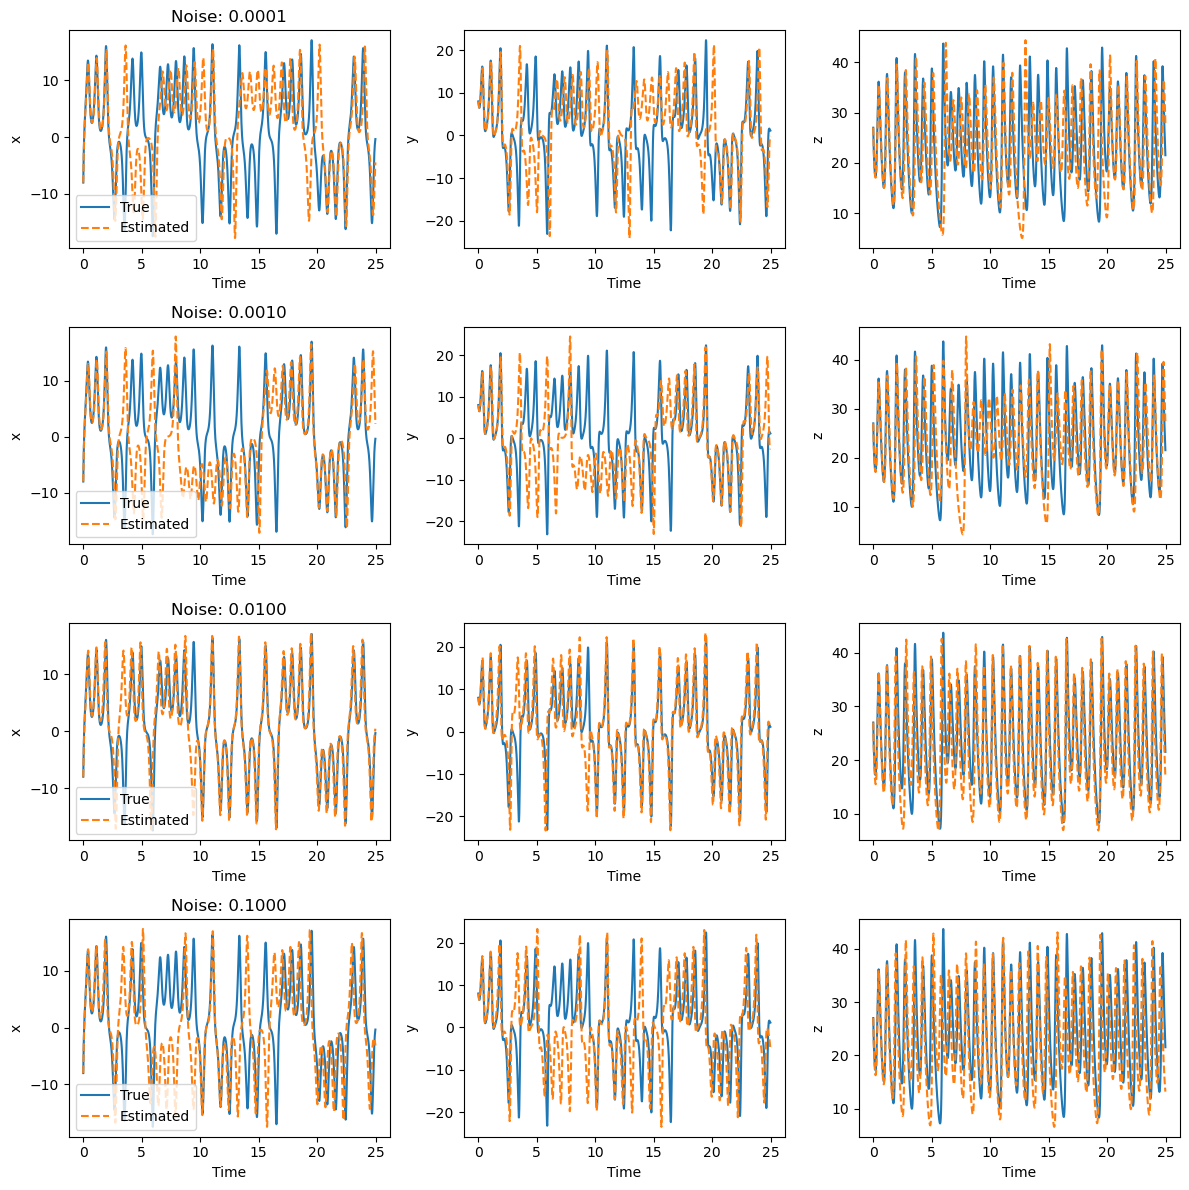

In [12]:
fig, axs = plt.subplots(len(noises), 3, figsize=(12, 12))

for i, noise in enumerate(noises):
    y_true = solve_ivp(lambda t, y: lorenz(t, y, sigma_true, rho_true, beta_true), [t[0], t[-1]], [-8, 8, 27], t_eval=t).y
    y_data = y_true + noise * colored_noise
    
    # Estimate the parameters using trust region method
    x0 = [9.5, 27.5, 2.6]  # initial guess for sigma, rho, beta
    res = minimize(lambda x: objective(x, t, y_data), x0, method='trust-constr', bounds=[(0, None), (0, None), (0, None)])
    sigma_opt, rho_opt, beta_opt = res.x

    # Solve the differential equation using the optimized parameters
    y0 = [-8, 8, 27]  # initial conditions
    sol = solve_ivp(lambda t, y: lorenz(t, y, sigma_opt, rho_opt, beta_opt), [t[0], t[-1]], y0, t_eval=t)

    axs[i, 0].plot(t, y_true[0], '-', label='True')
    axs[i, 0].plot(t, sol.y[0], '--', label='Estimated')
    axs[i, 0].set_xlabel('Time')
    axs[i, 0].set_ylabel('x')
    axs[i, 0].set_title(f"Noise: {noise:.4f}")
    axs[i, 0].legend()

    axs[i, 1].plot(t, y_true[1], '-', label='True')
    axs[i, 1].plot(t, sol.y[1], '--', label='Estimated')
    axs[i, 1].set_xlabel('Time')
    axs[i, 1].set_ylabel('y')
    #axs[i, 1].set_title(f"Noise: {noise:.4f}")
    #axs[i, 1].legend()

    axs[i, 2].plot(t, y_true[2], '-', label='True')
    axs[i, 2].plot(t, sol.y[2], '--', label='Estimated')
    axs[i, 2].set_xlabel('Time')
    axs[i, 2].set_ylabel('z')
    #axs[i, 2].set_title(f"Noise: {noise:.4f}")
    #axs[i, 2].legend()
    
plt.tight_layout()
plt.show()